In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Задание 1

* Создайте вектор с элементами от 12 до 42
* Создайте вектор из нулей длины 12, но его пятый елемент должен быть равен 1
* Создайте матрицу (3, 3), заполненую от 0 до 8
* Найдите все положительные числа в np.array([1,2,0,0,4,0])
* Умножьте матрицу размерности (5, 3) на (3, 2)
* оздайте матрицу (10, 10) так, чтобы на границе были 0, а внтури 1
* Создайте рандомный вектор и отсортируйте его
* Каков эквивалент функции enumerate для numpy массивов?
* Создайте рандомный вектор и выполните нормализацию столбцов (из каждого столбца вычесть среднее этого столбца, из каждого столбца вычесть sd этого столбца)
* Для заданного числа найдите ближайший к нему элемент в векторе
* Найдите N наибольших значений в векторе

In [50]:
v_0 = np.arange(12, 42+1)

v_1 = np.zeros(12)
v_1[5-1] = 1

v_2 = np.arange(9).reshape(3,3)

v_3 = np.array([1,2,0,0,4,0])
print(v_3[np.where(v_3>0)])

v_4_0 = np.random.randint(0, 100, (5,3))
v_4_1 = np.random.randint(0, 100, (3,2))
print(v_4_0.dot(v_4_1))

v_5 = np.pad(np.ones((8,8)), 1)

v_6 = np.random.randint(0, 100,(50, ))
v_6.sort()

v_7 = np.array([[1, 2], [3, 4]])
for index, x in np.ndenumerate(v_7):
    print(index, x)
    
v_8 = np.random.randint(0, 100, (10,30))
v_8 = (v_8 - np.mean(v_8, axis=0))/v_8.std(0, ddof=1)

def find_closest_neighbor(vector, example):
    dists = []
    for v in vector:
        dists.append(np.abs(v - example))
    return vector[np.argmin(np.array(dists))]
find_closest_neighbor(v_6, 39)

[1 2 4]
[[ 5591  5859]
 [ 4695  7011]
 [10191  7498]
 [12069  5160]
 [10788  7889]]
(0, 0) 1
(0, 1) 2
(1, 0) 3
(1, 1) 4


39

# Задание 2

In [18]:
def rgb_to_one(path, weights=np.array([0.299, 0.587, 0.114])):
    pic = np.array(Image.open(path))
    return np.sum([ weight*layer for weight, layer in zip(weights, pic.T)], axis=0).T

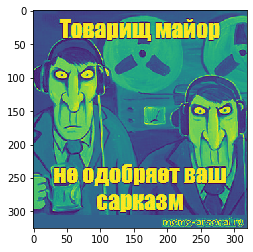

In [19]:
plt.imshow(rgb_to_one("/Users/alex/Downloads/2830d5c5cf131c11fb4436d11616d939.jpg"))

# Задание 3

In [59]:
import scipy
from scipy import linalg
import sympy

In [54]:
f = lambda x:  np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
X = np.linspace(1, 15, 500)

In [73]:
A_1, f_1 = [[x**0, x**1] for x in [1, 15]], [f(x) for x in [1, 15]]
A_2, f_2 = [[x**0, x**1, x**2] for x in [1, 8, 15]], [f(x) for x in [1, 8, 15]]
A_3, f_3 = [[x**0, x**1, x**2, x**3] for x in [1, 4, 10, 15]], [f(x) for x in [1, 4, 10, 15]]

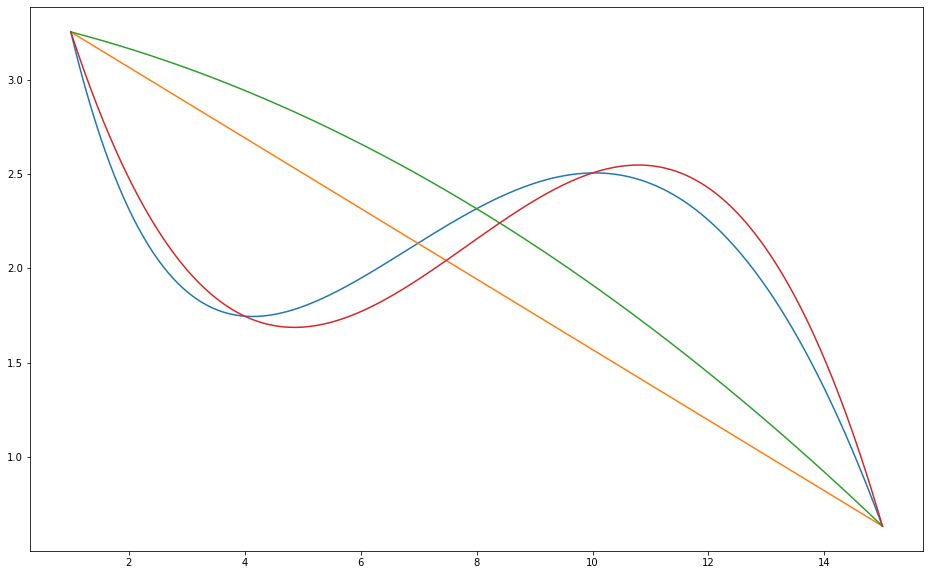

In [74]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(X, f(X))
ax.plot(X, [np.dot(scipy.linalg.solve(A_1, f_1), [1, x]) for x in X])
ax.plot(X, [np.dot(scipy.linalg.solve(A_2, f_2), [1, x, x**2]) for x in X])
ax.plot(X, [np.dot(scipy.linalg.solve(A_3, f_3), [1, x, x**2, x**3]) for x in X])

In [76]:
print(f"Ответ: {scipy.linalg.solve(A_3, f_3)}")

Ответ: [ 4.36264154 -1.29552587  0.19333685 -0.00823565]
